# In this project I will implement a supervised learning algorithm to explain the data set & predict the quality of wine.

## I begin by importing the libraries I will be using in this project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn as sk

## Now its time to import the Wine dataset

In [2]:
data = pd.read_csv("C:/Users/gavin/Jupyter/Datasets/winequality-red.csv")

## I want to know how many rows & columns are in the dataset. In this case I have 1599 rows & 12 columns

In [3]:
data.shape

(1599, 12)

## I want to confirm I have imported the Wine dataset with a visual that print the first 10 rows from the dataset.

In [4]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


## Next I want to see if any cleaning is required. I want to know if there are any missing values in my data set.

In [5]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## There are no missing values & I want to keep all information in the dataset.

## Next I want to see the statistics of each column with values.

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## It's time to get a better understanding of the Wine dataset through visual descriptions. Here is a correlation matrix that shows the correlation between all categories.

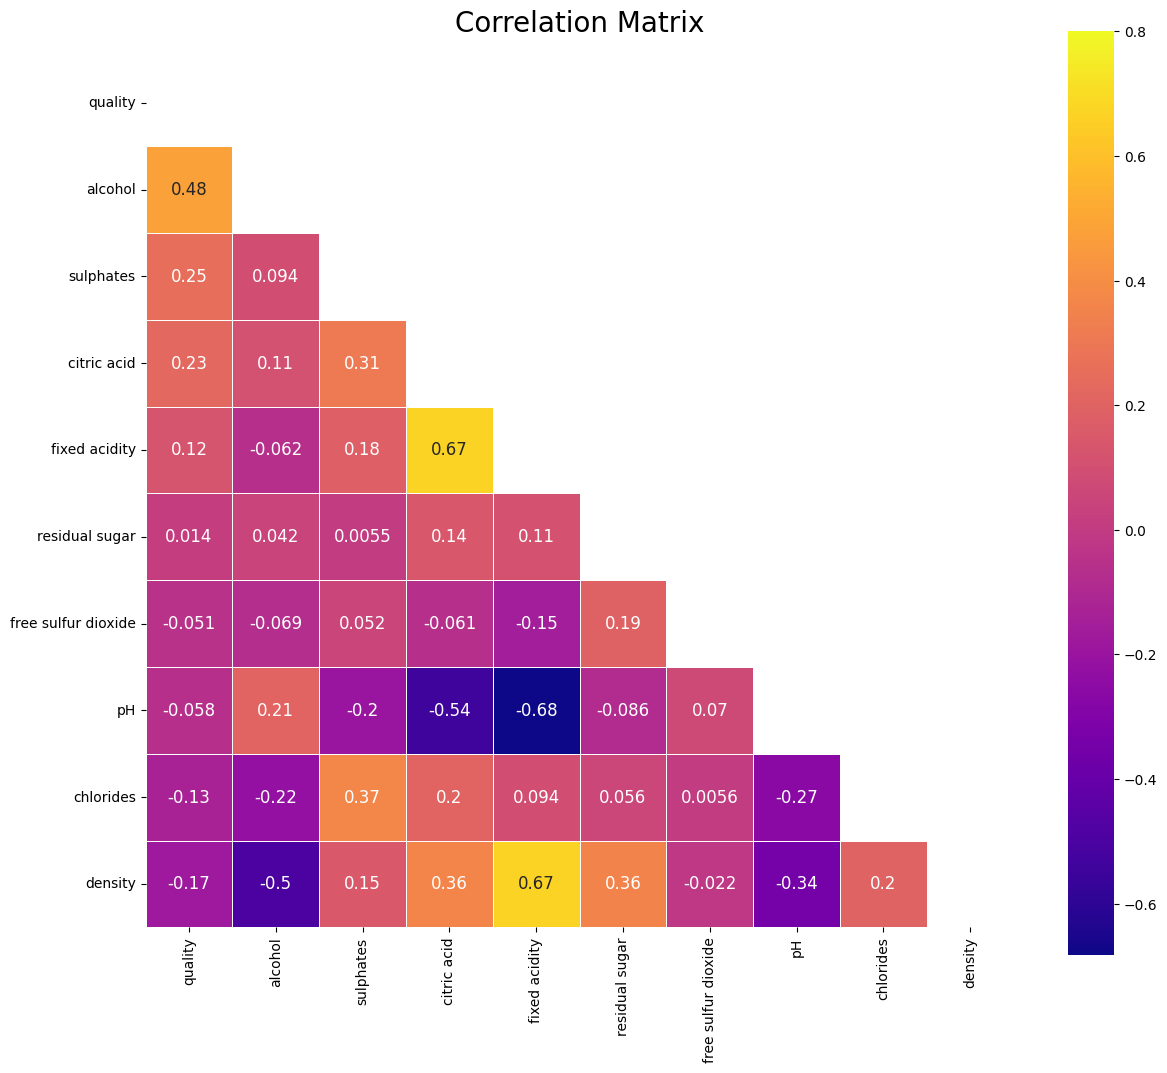

In [7]:
correlation = data.corr()
top_k = 10
cols = correlation.nlargest(top_k, 'quality').index

corr_matrix = np.corrcoef(data[cols].to_numpy().T)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(14, 12))
sb.heatmap(corr_matrix, mask=mask, vmax=.8, linewidths=0.5, square=True, annot=True,
            cmap='plasma', annot_kws={'size': 12}, xticklabels=cols, yticklabels=cols)

plt.title(f'Correlation Matrix', fontsize=20, pad=20)

ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)

plt.show()

## I want a count of each quality rating in my dataset. 

<Axes: xlabel='quality', ylabel='count'>

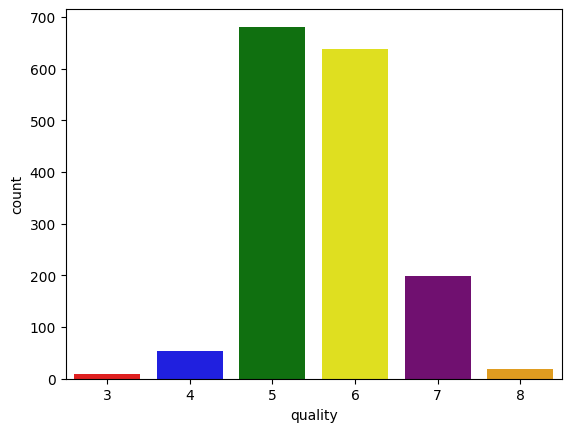

In [8]:
color = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'pink']  # Define the palette
color = color[:6]  # Trim the palette to have only 6 values
sb.countplot(data=data, x='quality', hue='quality', palette=color, legend=False)

## I am preparing to implement an algorithm to train & test. I begin by splitting the dataset into dependent & Independent sets. In this case my Independent value will be column 11, Quality. While all other columns are my dependent values.

In [9]:
X = data.iloc[:, [0,1,2,3,4,5,6,7,8,9,10]].values 
Y = data.iloc[:, 11].values 

## Next I can import the training & testing from sklearn. Here I split the data again into 80% training, 20% testing.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

## It's time to implement the supervised algorithm. I have chosen the Decision Tree Classifier for this dataset.

In [11]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Now that our algorithm is trained, we can implement our prediction.

In [12]:
y_predict = tree.predict(X_test)
y_predict

array([5, 5, 7, 5, 5, 6, 6, 6, 4, 5, 5, 5, 6, 6, 6, 7, 7, 5, 5, 6, 7, 6,
       6, 7, 6, 4, 5, 6, 5, 7, 6, 7, 6, 6, 7, 7, 6, 6, 6, 6, 6, 6, 6, 7,
       6, 6, 5, 6, 5, 6, 5, 4, 6, 6, 6, 5, 5, 5, 7, 6, 5, 6, 6, 5, 5, 6,
       5, 5, 6, 6, 5, 6, 4, 5, 6, 5, 5, 5, 5, 7, 6, 5, 6, 5, 6, 6, 7, 5,
       7, 5, 5, 6, 6, 6, 5, 5, 7, 5, 5, 5, 7, 6, 5, 7, 6, 6, 6, 5, 6, 5,
       6, 5, 8, 5, 6, 6, 7, 7, 7, 6, 5, 6, 6, 5, 8, 7, 5, 5, 6, 6, 6, 5,
       6, 6, 6, 5, 6, 5, 7, 5, 6, 5, 5, 5, 5, 6, 8, 6, 5, 6, 6, 5, 5, 6,
       6, 6, 5, 6, 6, 5, 5, 5, 7, 5, 5, 5, 6, 6, 6, 6, 7, 5, 5, 6, 5, 6,
       6, 6, 7, 5, 5, 8, 6, 7, 7, 5, 7, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5,
       5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 8, 5, 6, 5, 6, 6, 5,
       5, 5, 7, 6, 5, 6, 7, 6, 6, 6, 5, 7, 5, 5, 6, 6, 5, 7, 7, 6, 5, 5,
       4, 5, 6, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5, 4, 6, 7, 5, 6, 5, 6,
       5, 4, 7, 5, 5, 6, 6, 6, 5, 6, 7, 6, 7, 6, 6, 7, 5, 7, 6, 5, 6, 5,
       5, 5, 7, 6, 5, 5, 6, 6, 5, 6, 6, 5, 6, 5, 6,

## 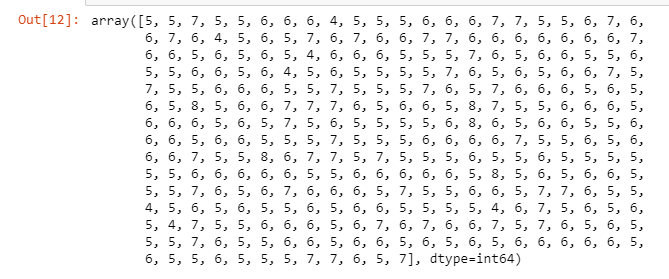It appears that our prediction shows different Wines to have a rated quality mostly between 5 - 7. Now to clear any doubts about the prediction we can test the accuracy.

In [13]:
print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train)*100)

[5]Decision Tree Classifier Training Accuracy: 100.0


## The accuracy test has returned a 100% accuracy score. 
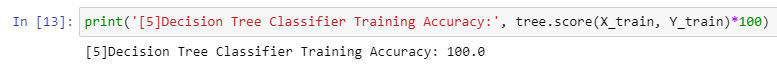

# References

# Kaggle Red Wine Quality Dataset https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009